In [1]:
pip install pyaudio


Note: you may need to restart the kernel to use updated packages.


In [1]:
import librosa
import soundfile
import os, glob, pickle
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score

#Extract features (mfcc, chroma, mel) from a sound file
def extract_feature(file_name, mfcc, chroma, mel):
    with soundfile.SoundFile(file_name) as sound_file:
        X = sound_file.read(dtype="float32")
        sample_rate=sound_file.samplerate
        if chroma:
            stft=np.abs(librosa.stft(X))
            result=np.array([])
        if mfcc:
            mfccs=np.mean(librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=40).T, axis=0)
            result=np.hstack((result, mfccs))
        if chroma:
            chroma=np.mean(librosa.feature.chroma_stft(S=stft, sr=sample_rate).T,axis=0)
            result=np.hstack((result, chroma))
        if mel:
            mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
            result=np.hstack((result, mel))
    return result


#Emotions in the RAVDESS dataset
emotions={
  '01':'neutral',
  '02':'calm',
  '03':'happy',
  '04':'sad',
  '05':'angry',
  '06':'fearful',
  '07':'disgust',
  '08':'surprised'
}
#Emotions to observe
observed_emotions=['calm', 'happy', 'fearful', 'disgust']

#Load the data and extract features for each sound file
def load_data(test_size=0.2):
    x,y=[],[]
    for file in glob.glob("D:\\EPITA\\Curriculum\\Optimization\\ravdess-emotional-speech-audio\\Actor_*\\*.wav"):
        file_name=os.path.basename(file)
        emotion=emotions[file_name.split("-")[2]]
        if emotion not in observed_emotions:
            continue
        feature=extract_feature(file, mfcc=True, chroma=True, mel=True)
        x.append(feature)
        y.append(emotion)
    return train_test_split(np.array(x), y, test_size=test_size, random_state=9)

#Split the dataset
x_train,x_test,y_train,y_test=load_data(test_size=0.3)

#Get the number of features extracted
print(f'Features extracted: {x_train.shape[1]}')

#Initialize the Multi Layer Perceptron Classifier
model=MLPClassifier(alpha=0.01, batch_size=256, epsilon=1e-08, hidden_layer_sizes=(300,), learning_rate='adaptive', max_iter=1500)

#Train the model
model.fit(x_train,y_train)

#Predict for the test set
y_pred=model.predict(x_test)

#Calculate the accuracy of our model
accuracy=accuracy_score(y_true=y_test, y_pred=y_pred)
#DataFlair - Print the accuracy
print("Accuracy: {:.2f}%".format(accuracy*100))

Features extracted: 180
Accuracy: 77.23%


In [3]:
for i in range(len(x_test)):
    print(len(x_test[i]))

180
180
180
180
180
180
180
180
180
180
180
180
180
180
180
180
180
180
180
180
180
180
180
180
180
180
180
180
180
180
180
180
180
180
180
180
180
180
180
180
180
180
180
180
180
180
180
180
180
180
180
180
180
180
180
180
180
180
180
180
180
180
180
180
180
180
180
180
180
180
180
180
180
180
180
180
180
180
180
180
180
180
180
180
180
180
180
180
180
180
180
180
180
180
180
180
180
180
180
180
180
180
180
180
180
180
180
180
180
180
180
180
180
180
180
180
180
180
180
180
180
180
180
180
180
180
180
180
180
180
180
180
180
180
180
180
180
180
180
180
180
180
180
180
180
180
180
180
180
180
180
180
180
180
180
180
180
180
180
180
180
180
180
180
180
180
180
180
180
180
180
180
180
180
180
180
180
180
180
180
180
180
180
180
180
180
180
180
180
180
180
180
180
180
180
180
180
180
180
180
180
180


In [6]:
print(x_train, y_train)
print(len(x_test))

[[-6.98910828e+02  6.72396469e+01  6.17663145e+00 ...  7.71708741e-08
   1.28724302e-08  7.11364478e-09]
 [-6.19317871e+02  7.58024979e+01 -1.19600601e+01 ...  6.41060012e-07
   6.25748768e-08  7.33082395e-09]
 [-4.85298309e+02  7.49215622e+01 -1.19717941e+01 ...  4.06490835e-06
   3.61294155e-07  1.45132075e-08]
 ...
 [-5.98688110e+02  5.80942459e+01 -7.90877283e-01 ...  1.83178611e-06
   1.84982994e-07  7.96273536e-09]
 [-6.67639465e+02  6.86084976e+01  5.38877678e+00 ...  1.23163659e-07
   1.47386148e-08  7.43224149e-09]
 [-6.13189148e+02  4.63625526e+01 -2.80027676e+00 ...  1.59534557e-06
   1.13446816e-07  1.10568239e-08]] ['disgust', 'happy', 'disgust', 'calm', 'disgust', 'happy', 'disgust', 'disgust', 'calm', 'disgust', 'fearful', 'fearful', 'calm', 'fearful', 'disgust', 'fearful', 'fearful', 'calm', 'fearful', 'disgust', 'calm', 'happy', 'calm', 'calm', 'fearful', 'fearful', 'happy', 'happy', 'calm', 'disgust', 'disgust', 'happy', 'fearful', 'happy', 'disgust', 'disgust', 'fear

In [4]:
print(x_test, y_test)

[[-4.69359497e+02  7.23961868e+01 -1.47085667e+01 ...  2.22055201e-06
   2.07237392e-07  1.21822712e-08]
 [-6.08390015e+02  7.58604202e+01 -7.15431976e+00 ...  9.89099362e-07
   9.58929718e-08  9.69895098e-09]
 [-5.69346558e+02  5.87526665e+01 -1.13478670e+01 ...  7.11634584e-07
   6.14814866e-08  6.11492723e-09]
 ...
 [-7.47700439e+02  7.80554810e+01  1.11761608e+01 ...  6.80388084e-08
   1.02505373e-08  6.75965328e-09]
 [-5.68636047e+02  7.14218979e+01 -4.45530128e+00 ...  3.84268077e-07
   3.38872468e-08  8.88563267e-09]
 [-6.60817017e+02  8.33865356e+01  1.29060736e+01 ...  2.30356250e-08
   8.39595238e-09  8.13792500e-09]] ['happy', 'disgust', 'disgust', 'calm', 'fearful', 'disgust', 'disgust', 'disgust', 'disgust', 'disgust', 'happy', 'fearful', 'disgust', 'fearful', 'disgust', 'calm', 'happy', 'disgust', 'calm', 'calm', 'fearful', 'happy', 'happy', 'happy', 'calm', 'calm', 'disgust', 'calm', 'disgust', 'happy', 'disgust', 'disgust', 'disgust', 'disgust', 'fearful', 'happy', 'fea

In [8]:
#print(x_t)

In [34]:
combine = list(zip(y_train, x_train))

dict1 = {'happy': [], 'disgust': [], 'fearful': [], 'calm': [] }

for i in range(len(combine)):
    if combine[i][0] == 'happy':
        dict1['happy'] = combine[i][1]
    elif combine[i][0] == 'disgust':
        dict1['disgust'] = combine[i][1]
    elif combine[i][0] == 'fearful':
        dict1['fearful'] = combine[i][1]
    elif combine[i][0] == 'calm':
        dict1['calm'] = combine[i][1]
        
        
#print(dict1)


for i in dict1.keys():
    for j in range(len(combine)):
        if i==combine[j][0]:
            dict1[i] +=combine[j][1]
#print(dict1)
for _,v in dict1.items():
    print(len(v))

180
180
180
180


In [32]:
import pandas as pd

df = pd.DataFrame(dict1, columns=['happy','disgust','fearful', 'calm'])
print(df)

             happy        disgust        fearful           calm
0   -405008.513672 -410826.318848 -429880.694092 -479508.378540
1     46082.402729   45331.546745   44287.449097   51806.374969
2     -7730.588783   -1554.136426   -9484.180100    3184.737988
3      3874.354533    7809.382819    5222.454152   11553.466942
4        97.627499       1.098360   -2227.419706    2043.518598
..             ...            ...            ...            ...
175       0.007466       0.002484       0.012162       0.000134
176       0.005592       0.001876       0.008649       0.000103
177       0.002571       0.000896       0.004037       0.000054
178       0.000238       0.000088       0.000378       0.000009
179       0.000006       0.000005       0.000007       0.000005

[180 rows x 4 columns]


            happy   disgust   fearful      calm
happy    1.000000  0.999745  0.999850  0.999315
disgust  0.999745  1.000000  0.999608  0.999861
fearful  0.999850  0.999608  1.000000  0.999161
calm     0.999315  0.999861  0.999161  1.000000


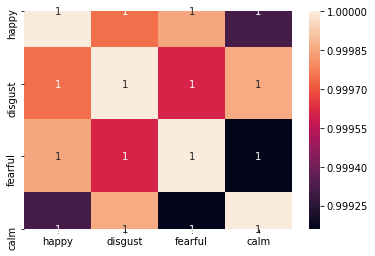

In [8]:
import matplotlib.pyplot as plt
import seaborn as sn

print(df.corr())



corrMatrix = df.corr()
sn.heatmap(corrMatrix, annot=True)

#-------------------------------------------------------------------------------------------------------------------

In [36]:
print(x_test.shape)
print(len(y_test))

(202, 180)
202


In [10]:
print(len(x_test[0]))

180


In [24]:
#np addition

net = list(zip(x_test, y_test))
print(net)



for j in range(len(combine)):
    if i==combine[j][0]:
        dict1[i].append(j)
#print(dict1)



[(array([-4.69359497e+02,  7.23961868e+01, -1.47085667e+01,  1.17691593e+01,
        2.72554851e+00,  1.29140396e+01, -1.53342037e+01, -5.57917309e+00,
       -9.37020016e+00, -3.31779122e+00, -5.56291628e+00,  2.28264153e-01,
       -3.32672977e+00, -3.90390110e+00, -6.77387476e-01,  1.87282658e+00,
       -5.87076092e+00,  9.22107041e-01,  9.71666157e-01, -3.76375747e+00,
       -2.26903582e+00,  1.23231664e-01, -1.56450915e+00, -1.17933202e+00,
       -3.15960860e+00, -2.97370005e+00, -1.77605879e+00,  1.76560730e-01,
       -2.73466021e-01,  1.20007050e+00,  3.85363793e+00,  5.01226568e+00,
        2.51397276e+00,  6.08709574e+00,  5.22042894e+00,  4.82973719e+00,
        3.82241917e+00,  5.25589895e+00,  5.05648756e+00,  4.20790291e+00,
        7.07682669e-01,  6.84015512e-01,  6.71613276e-01,  6.45449519e-01,
        6.32599354e-01,  6.17417216e-01,  6.22546613e-01,  6.40359581e-01,
        6.98347986e-01,  7.36824453e-01,  7.25428939e-01,  7.10902452e-01,
        4.79900353e-02,

In [51]:
for keys, values in emotions.items():
    print(keys,values)

01 neutral
02 calm
03 happy
04 sad
05 angry
06 fearful
07 disgust
08 surprised


In [63]:
for i in observed_emotions:
    for key, values in emotions.items():
        if i == values:
            print(key,values)

02 calm
03 happy
06 fearful
07 disgust


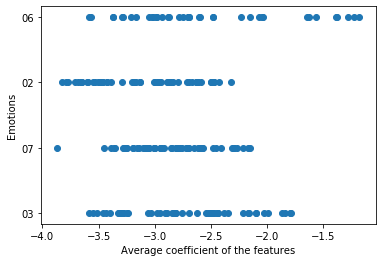

In [64]:
#To see the clustered data, we first average the values of the features of the audio files. We then 

average_array = [] 
for i in range(len(x_test)):
    k=0
    for j in range(len(x_test[i])):
        k += (x_test[i][j]/len(x_test))
    average_array.append(k)

test_emotion_keys = []
for i in y_test:
    for key, value in emotions.items():
        if i == value:
            test_emotion_keys.append(key)
#print(test_emotion_keys)

plt.scatter(average_array, test_emotion_keys)
plt.xlabel("Average coefficient of the features")
plt.ylabel("Emotions")
plt.show()



In [22]:
print(len(average_array),len(test_emotion_keys))

202 202


In [57]:
'''combine = list(zip(y_test, average_array))

#print(combine)
dict1 = {'happy': [], 'disgust': [], 'fearful': [], 'calm': [] }

for i in dict1.keys():
    #print(i)
    for j in range(len(combine)):
        if i==combine[j][0]:
            dict1[i].append(j)
#print(dict1)
for _,v in dict1.items():
    print(len(v))'''

50
58
39
55


In [65]:
'''import pandas as pd

df = pd.DataFrame(dict1, columns=['happy','disgust','fearful', 'calm'])
print(df)
'''

"import pandas as pd\n\ndf = pd.DataFrame(dict1, columns=['happy','disgust','fearful', 'calm'])\nprint(df)\n"